In [1]:
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

## Análise exploratória

In [2]:
df = pd.read_csv('dataset.csv')
display(df)

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.0,30000.0,Feminino,5.741706,Não,0
1,58.0,50000.0,Feminino,21.885505,Sim,0
2,50.0,70000.0,Feminino,6.121339,Não,1
3,21.0,100000.0,Feminino,16.264925,Não,0
4,59.0,50000.0,Feminino,28.235667,Sim,1
...,...,...,...,...,...,...
195,19.0,30000.0,Masculino,29.390255,NaN,1
196,NaN,50000.0,Feminino,21.024302,Sim,0
197,54.0,30000.0,Feminino,25.562014,Não,1
198,22.0,50000.0,NaN,8.313117,Não,0


In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                190 non-null    float64
 1   Renda Anual (em $)   189 non-null    float64
 2   Gênero               193 non-null    object 
 3   Tempo no Site (min)  200 non-null    float64
 4   Anúncio Clicado      190 non-null    object 
 5   Compra (0 ou 1)      200 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB


None

In [4]:
null_data = df[df.isnull().any(axis=1)]
display(null_data)

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
100,37.0,70000.0,Masculino,22.378614,NaN,0
101,NaN,30000.0,Feminino,15.107969,Sim,0
102,28.0,NaN,Masculino,15.704990,Não,0
107,NaN,50000.0,Masculino,-1.000000,Sim,0
112,31.0,70000.0,Masculino,7.141456,NaN,0
114,35.0,30000.0,Feminino,9.796683,NaN,1
122,NaN,50000.0,Feminino,10.842802,Não,0
124,NaN,30000.0,Feminino,27.001977,Sim,0
126,23.0,30000.0,NaN,18.323945,Não,0
129,39.0,NaN,Masculino,21.737174,NaN,1


In [5]:
numeric_columns = df.select_dtypes(include=['number'])

invalid_data = df[(numeric_columns< 0).any(axis=1)]

display(invalid_data)

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
107,NaN,50000.0,Masculino,-1.0,Sim,0
116,40.0,30000.0,Masculino,-1.0,Sim,0
132,NaN,50000.0,Masculino,-1.0,NaN,0
133,20.0,NaN,NaN,-1.0,Sim,0
147,54.0,70000.0,Masculino,-1.0,Sim,1


In [6]:
df = df.dropna()
df = df.drop(df.index.intersection(invalid_data.index))
df = df.reset_index(drop=True)

display(df)

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.0,30000.0,Feminino,5.741706,Não,0
1,58.0,50000.0,Feminino,21.885505,Sim,0
2,50.0,70000.0,Feminino,6.121339,Não,1
3,21.0,100000.0,Feminino,16.264925,Não,0
4,59.0,50000.0,Feminino,28.235667,Sim,1
...,...,...,...,...,...,...
160,34.0,70000.0,Feminino,9.338113,Sim,0
161,42.0,50000.0,Feminino,22.373777,Não,0
162,45.0,100000.0,Masculino,13.652493,Sim,0
163,54.0,30000.0,Feminino,25.562014,Não,1


In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                165 non-null    float64
 1   Renda Anual (em $)   165 non-null    float64
 2   Gênero               165 non-null    object 
 3   Tempo no Site (min)  165 non-null    float64
 4   Anúncio Clicado      165 non-null    object 
 5   Compra (0 ou 1)      165 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 7.9+ KB


None

### Idade

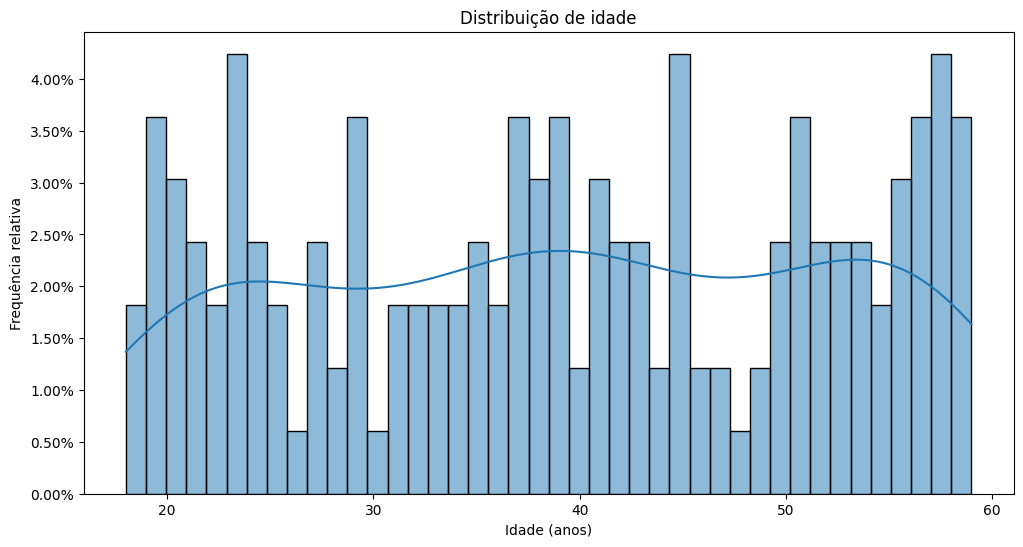

In [8]:
plt.figure(figsize=(12, 6))

sns.histplot(df['Idade'], stat="probability", kde=True, bins = 42)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.xlabel('Idade (anos)')
plt.ylabel("Frequência relativa")
plt.title('Distribuição de idade')

plt.show()

In [9]:
# Poucos usuários com menos de 20 anos compram uma casa
temp_df = df[df['Idade'] <= 20]
display(temp_df["Compra (0 ou 1)"].value_counts(normalize = True).map("{:.2%}".format))

Compra (0 ou 1)
0    85.71%
1    14.29%
Name: proportion, dtype: object

### Renda anual

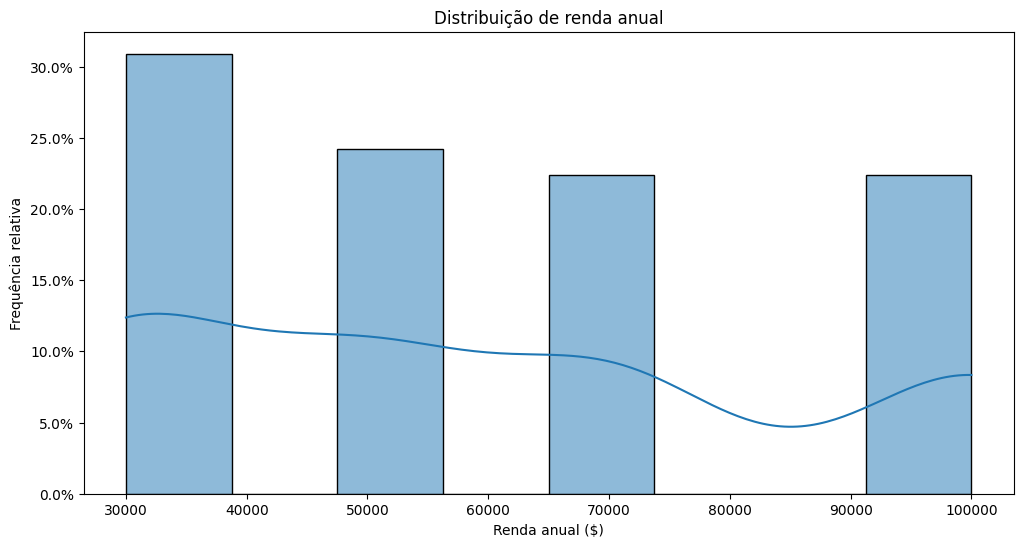

In [10]:
plt.figure(figsize=(12, 6))

sns.histplot(df['Renda Anual (em $)'], stat="probability", kde=True, bins=8)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.xlabel('Renda anual ($)')
plt.ylabel("Frequência relativa")
plt.title('Distribuição de renda anual')

plt.show()

In [11]:
# A renda anual dos usuários é um fator pouco determinante para a compra
temp_df = df[df['Renda Anual (em $)'] > 70000 ]
display(temp_df["Compra (0 ou 1)"].value_counts(normalize = True).map("{:.2%}".format))

Compra (0 ou 1)
0    72.97%
1    27.03%
Name: proportion, dtype: object

### Gênero

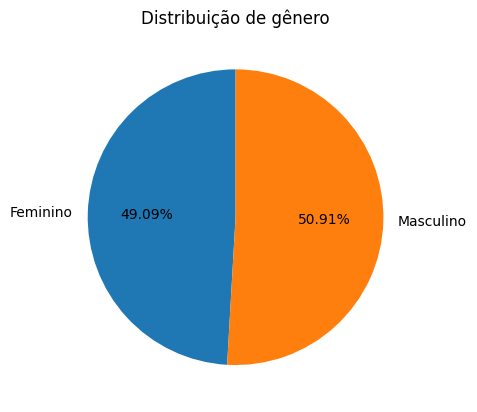

In [12]:
gender_distribution = df["Gênero"].value_counts(normalize=True).sort_index()
genders, frequencies = gender_distribution.index, gender_distribution.values

plt.pie(frequencies, labels=genders, autopct='%1.2f%%', startangle=90)

plt.title('Distribuição de gênero')

plt.show()

In [13]:
# Homens e mulheres compram casas na mesma proporção 
temp_df = df[df["Gênero"] == "Masculino"]
display(temp_df["Compra (0 ou 1)"].value_counts(normalize = True).map("{:.2%}".format))

Compra (0 ou 1)
0    67.86%
1    32.14%
Name: proportion, dtype: object

### Tempo no site

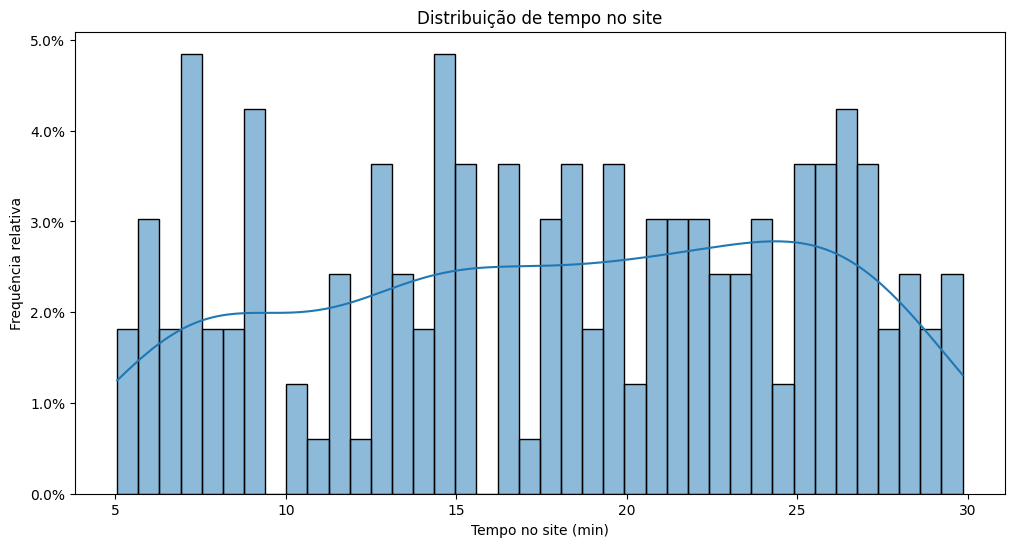

In [14]:
plt.figure(figsize=(12, 6))

sns.histplot(df["Tempo no Site (min)"], stat="probability", kde=True, bins=40)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.xlabel('Tempo no site (min)')
plt.ylabel("Frequência relativa")
plt.title('Distribuição de tempo no site')

plt.show()

In [15]:
# Usuários que passam menos de 10 minutos no site tendem a não comprar
temp_df = df[df["Tempo no Site (min)"] <= 10]
display(temp_df["Compra (0 ou 1)"].value_counts(normalize = True).map("{:.2%}".format))

Compra (0 ou 1)
0    81.25%
1    18.75%
Name: proportion, dtype: object

### Anúncio clicado

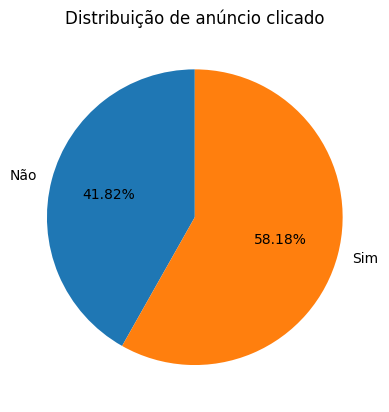

In [16]:
ad_distribution = df["Anúncio Clicado"].value_counts(normalize=True).sort_index()
options, frequencies = ad_distribution.index, ad_distribution.values

plt.pie(frequencies, labels=options, autopct='%1.2f%%', startangle=90)

plt.title('Distribuição de anúncio clicado')

plt.show()

In [17]:
# Usuários que clicam em anúncios compram um pouco mais do que os que não clicam
# No entanto, a diferença é pequena
temp_df = df[df["Anúncio Clicado"] == "Sim"]
display(temp_df["Compra (0 ou 1)"].value_counts(normalize = True).map("{:.2%}".format))

Compra (0 ou 1)
0    62.50%
1    37.50%
Name: proportion, dtype: object

### Compra

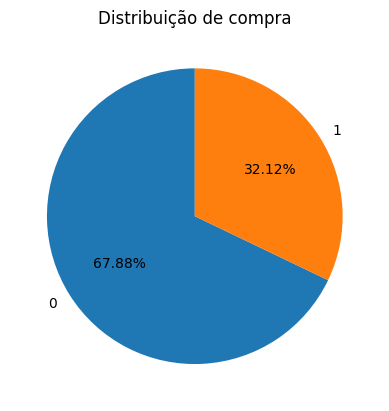

In [18]:
purchase_distribution = df["Compra (0 ou 1)"].value_counts(normalize=True).sort_index()
options, frequencies = purchase_distribution.index, purchase_distribution.values

plt.pie(frequencies, labels=options, autopct='%1.2f%%', startangle=90)

plt.title('Distribuição de compra')

plt.show()

In [19]:
display(df.groupby("Compra (0 ou 1)").mean(numeric_only = True))

,Idade,Renda Anual (em $),Tempo no Site (min)
Compra (0 ou 1),,,
0,38.419643,60625.000000,17.331078
1,41.018868,57169.811321,19.396592


## Pré-processamento

In [20]:
label_encoder = LabelEncoder()

df["Gênero"] = label_encoder.fit_transform(df["Gênero"])
df["Anúncio Clicado"] = label_encoder.fit_transform(df["Anúncio Clicado"])

display(df)

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.0,30000.0,0,5.741706,0,0
1,58.0,50000.0,0,21.885505,1,0
2,50.0,70000.0,0,6.121339,0,1
3,21.0,100000.0,0,16.264925,0,0
4,59.0,50000.0,0,28.235667,1,1
...,...,...,...,...,...,...
160,34.0,70000.0,0,9.338113,1,0
161,42.0,50000.0,0,22.373777,0,0
162,45.0,100000.0,1,13.652493,1,0
163,54.0,30000.0,0,25.562014,0,1


In [21]:
standard_scaler = StandardScaler()

features = df.drop("Compra (0 ou 1)", axis=1)
target = df["Compra (0 ou 1)"]

features_train, features_test, target_train, target_test = train_test_split(
  features, target, test_size=0.2, random_state=1
)

features_train = standard_scaler.fit_transform(features_train)
features_test = standard_scaler.transform(features_test)

## Construção dos modelos de classificação

### Decision Tree

In [22]:
dt = DecisionTreeClassifier(random_state=1)

hyperparameters = {
  'max_depth': [None, 10, 20, 30],    
  'min_samples_split': [2, 10, 20],   
  'min_samples_leaf': [1, 2, 5],     
  'criterion': ['gini', 'entropy'], 
  'max_features': [None, 'sqrt', 'log2'], 
}

grid_search = GridSearchCV(
  estimator=dt, 
  param_grid=hyperparameters, 
  cv=5,
  scoring="accuracy"
)

grid_search.fit(features_train, target_train)

grid_search_results = pd.DataFrame(grid_search.cv_results_)

display(grid_search_results[[
  'param_max_depth', 
  'param_min_samples_split', 
  'param_min_samples_leaf', 
  'param_criterion', 
  'param_max_features', 
  'mean_test_score'
]])


,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_criterion,param_max_features,mean_test_score
0,None,2,1,gini,None,0.515385
1,None,10,1,gini,None,0.575783
2,None,20,1,gini,None,0.522222
3,None,2,2,gini,None,0.591738
4,None,10,2,gini,None,0.576353
...,...,...,...,...,...,...
211,30,10,2,entropy,log2,0.628205
212,30,20,2,entropy,log2,0.515385
213,30,2,5,entropy,log2,0.621652
214,30,10,5,entropy,log2,0.621652


In [23]:
best_dt = grid_search.best_estimator_

best_dt.fit(features_train, target_train)

best_dt_predictions = best_dt.predict(features_test)
best_dt_accuracy = accuracy_score(target_test, best_dt_predictions)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor precisão de validação cruzada:", grid_search.best_score_)
print("Precisão no conjunto de teste:", best_dt_accuracy)

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Melhor precisão de validação cruzada: 0.6284900284900284
Precisão no conjunto de teste: 0.5454545454545454


In [24]:
print(classification_report(target_test, best_dt_predictions))

              precision    recall  f1-score   support

           0       0.58      0.79      0.67        19
           1       0.43      0.21      0.29        14

    accuracy                           0.55        33
   macro avg       0.50      0.50      0.48        33
weighted avg       0.51      0.55      0.51        33



In [25]:
print(confusion_matrix(target_test, best_dt_predictions))

[[15  4]
 [11  3]]


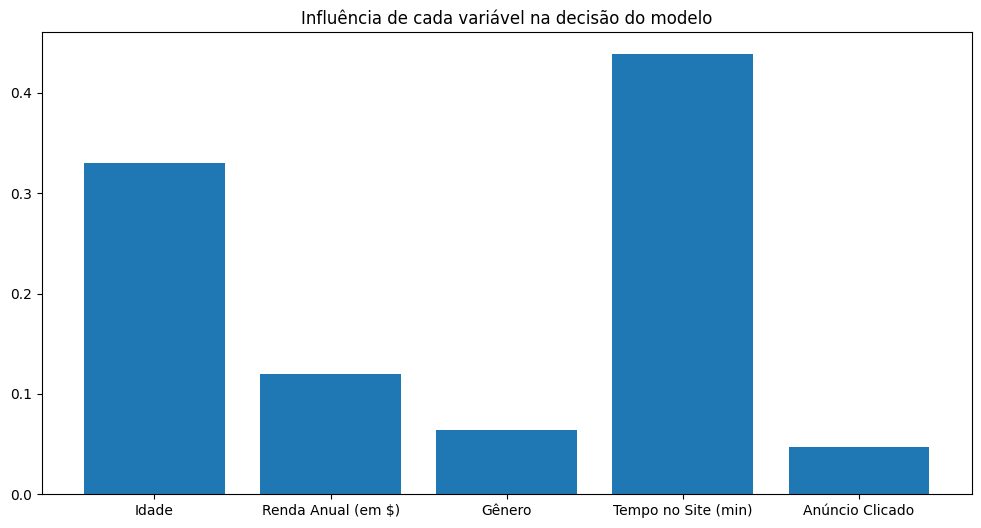

In [26]:
plt.figure(figsize=(12, 6)) 
plt.bar(features.columns, best_dt.feature_importances_)

plt.title("Influência de cada variável na decisão do modelo")

plt.show()

### K-Nearest Neighbors

In [27]:
knn = KNeighborsClassifier()

hyperparameters = {
  "n_neighbors": [3, 5, 7, 9, 11], 
  "weights": ['uniform', 'distance'],  
  "metric": ['euclidean', 'manhattan']  
}

grid_search = GridSearchCV(
  estimator=knn,
  param_grid=hyperparameters,
  cv=5,
  scoring="accuracy",
)

grid_search.fit(features_train, target_train)

grid_search_results = pd.DataFrame(grid_search.cv_results_)

display(grid_search_results[[
  "param_n_neighbors", 
  "param_weights", 
  "param_metric", 
  "mean_test_score"
]])

,param_n_neighbors,param_weights,param_metric,mean_test_score
0,3,uniform,euclidean,0.612536
1,3,distance,euclidean,0.590598
2,5,uniform,euclidean,0.659544
3,5,distance,euclidean,0.621937
4,7,uniform,euclidean,0.651567
5,7,distance,euclidean,0.613960
6,9,uniform,euclidean,0.689459
7,9,distance,euclidean,0.636752
8,11,uniform,euclidean,0.659544
9,11,distance,euclidean,0.659544


In [28]:
best_knn = grid_search.best_estimator_

best_knn.fit(features_train, target_train)

best_knn_predictions = best_knn.predict(features_test)
best_knn_accuracy = accuracy_score(target_test, best_knn_predictions)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor precisão de validação cruzada:", grid_search.best_score_)
print("Precisão no conjunto de teste:", best_knn_accuracy)

Melhores parâmetros: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Melhor precisão de validação cruzada: 0.69002849002849
Precisão no conjunto de teste: 0.6060606060606061


In [29]:
print(classification_report(target_test, best_knn_predictions))

              precision    recall  f1-score   support

           0       0.61      0.89      0.72        19
           1       0.60      0.21      0.32        14

    accuracy                           0.61        33
   macro avg       0.60      0.55      0.52        33
weighted avg       0.60      0.61      0.55        33



In [30]:
print(confusion_matrix(target_test, best_knn_predictions))

[[17  2]
 [11  3]]


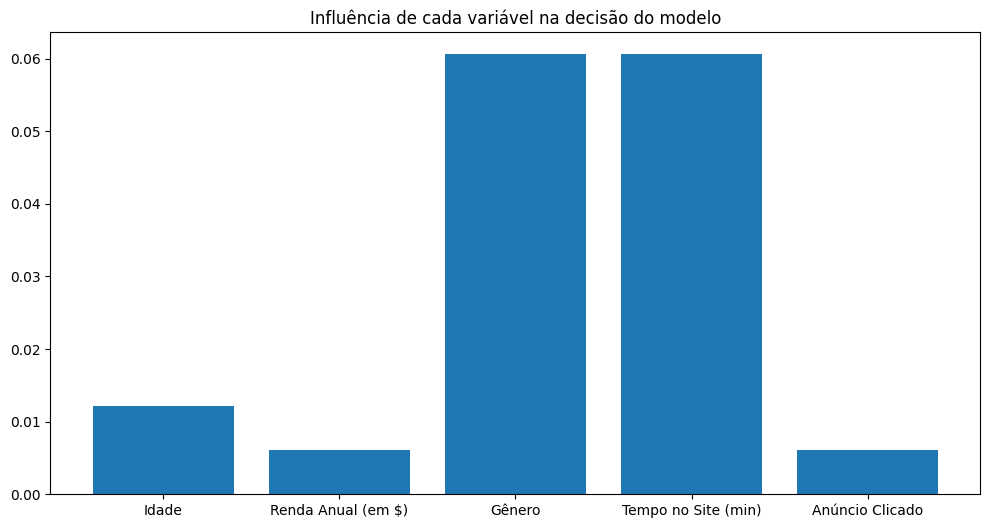

In [31]:
permutation = permutation_importance(best_knn, features_test, target_test, random_state=1)
importances = abs(permutation.importances_mean)

plt.figure(figsize=(12, 6))
plt.bar(features.columns, importances)

plt.title("Influência de cada variável na decisão do modelo")

plt.show()

### Logistic Regression

In [32]:
lr = LogisticRegression(random_state=1, class_weight='balanced')

hyperparameters = {
  "C": [0.01, 0.1, 1, 10], 
  "solver": ['liblinear', "lbfgs"], 
  "max_iter": [100, 300, 1000],
}

grid_search = GridSearchCV(
  estimator=lr,
  param_grid=hyperparameters,
  cv=5,
  scoring="accuracy",
)

grid_search.fit(features_train, target_train)

grid_search_results = pd.DataFrame(grid_search.cv_results_)

display(grid_search_results[[
  "param_C", 
  "param_solver", 
  "param_max_iter",
  "mean_test_score"
]])

,param_C,param_solver,param_max_iter,mean_test_score
0,0.01,liblinear,100,0.523077
1,0.01,lbfgs,100,0.523077
2,0.01,liblinear,300,0.523077
3,0.01,lbfgs,300,0.523077
4,0.01,liblinear,1000,0.523077
5,0.01,lbfgs,1000,0.523077
6,0.10,liblinear,100,0.523077
7,0.10,lbfgs,100,0.538462
8,0.10,liblinear,300,0.523077
9,0.10,lbfgs,300,0.538462


In [33]:
best_lr = grid_search.best_estimator_

best_lr.fit(features_train, target_train)

best_lr_predictions = best_lr.predict(features_test)
best_lr_accuracy = accuracy_score(target_test, best_lr_predictions)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor precisão de validação cruzada:", grid_search.best_score_)
print("Precisão no conjunto de teste:", best_lr_accuracy)

Melhores parâmetros: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
Melhor precisão de validação cruzada: 0.5384615384615385
Precisão no conjunto de teste: 0.6060606060606061


In [34]:
print(classification_report(target_test, best_lr_predictions))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67        19
           1       0.54      0.50      0.52        14

    accuracy                           0.61        33
   macro avg       0.59      0.59      0.59        33
weighted avg       0.60      0.61      0.60        33



In [35]:
print(confusion_matrix(target_test, best_lr_predictions))

[[13  6]
 [ 7  7]]


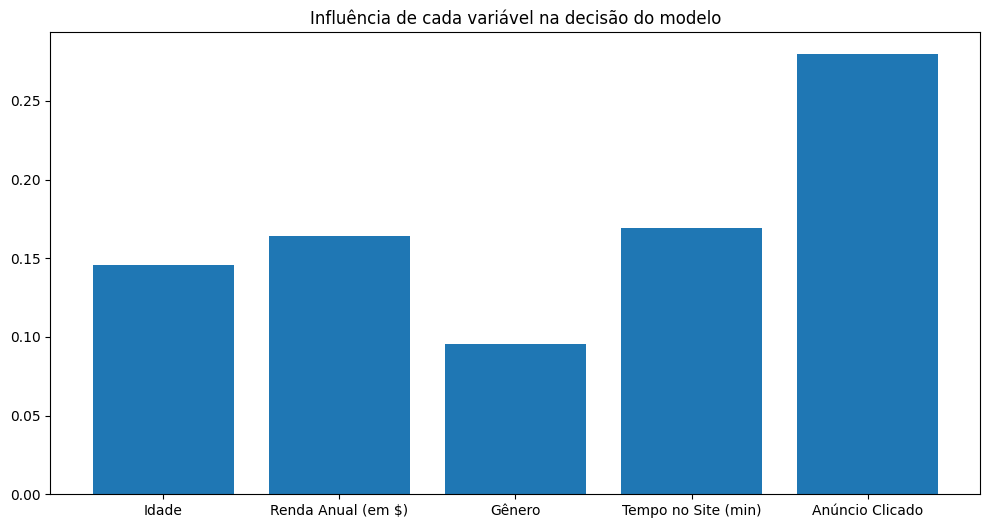

In [36]:
coefficients = np.abs(best_lr.coef_[0])

plt.figure(figsize=(12, 6))
plt.bar(features.columns, coefficients)

plt.title("Influência de cada variável na decisão do modelo")

plt.show()

### Random Forest

In [37]:
rf = RandomForestClassifier(random_state=1)

hyperparameters = {
    "n_estimators": [50, 100, 150],  
    "max_depth": [10, 20, 30],      
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4],    
    "bootstrap": [False, True]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=hyperparameters,
    cv=5,               
    scoring="accuracy"
)

grid_search.fit(features_train, target_train)

grid_search_results = pd.DataFrame(grid_search.cv_results_)

display(grid_search_results[[
  "param_n_estimators", 
  "param_max_depth", 
  "param_min_samples_split", 
  "param_min_samples_leaf", 
  "param_bootstrap", 
  "mean_test_score"
]])

/opt/homebrew/lib/python3.13/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_bootstrap,mean_test_score
0,50,10,2,1,False,0.546154
1,100,10,2,1,False,0.560969
2,150,10,2,1,False,0.553561
3,50,10,5,1,False,0.569516
4,100,10,5,1,False,0.561538
...,...,...,...,...,...,...
157,100,30,5,4,True,0.674359
158,150,30,5,4,True,0.666952
159,50,30,10,4,True,0.659544
160,100,30,10,4,True,0.674359


In [38]:
best_rf = grid_search.best_estimator_

best_rf.fit(features_train, target_train)

best_rf_predictions = best_rf.predict(features_test)
best_rf_accuracy = accuracy_score(target_test, best_rf_predictions)

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor precisão de validação cruzada:", grid_search.best_score_)
print("Precisão no conjunto de teste:", best_rf_accuracy)

Melhores parâmetros: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Melhor precisão de validação cruzada: 0.6820512820512821
Precisão no conjunto de teste: 0.6060606060606061


In [39]:
print(classification_report(target_test, best_rf_predictions))

              precision    recall  f1-score   support

           0       0.60      0.95      0.73        19
           1       0.67      0.14      0.24        14

    accuracy                           0.61        33
   macro avg       0.63      0.55      0.48        33
weighted avg       0.63      0.61      0.52        33



In [40]:
print(confusion_matrix(target_test, best_rf_predictions))

[[18  1]
 [12  2]]


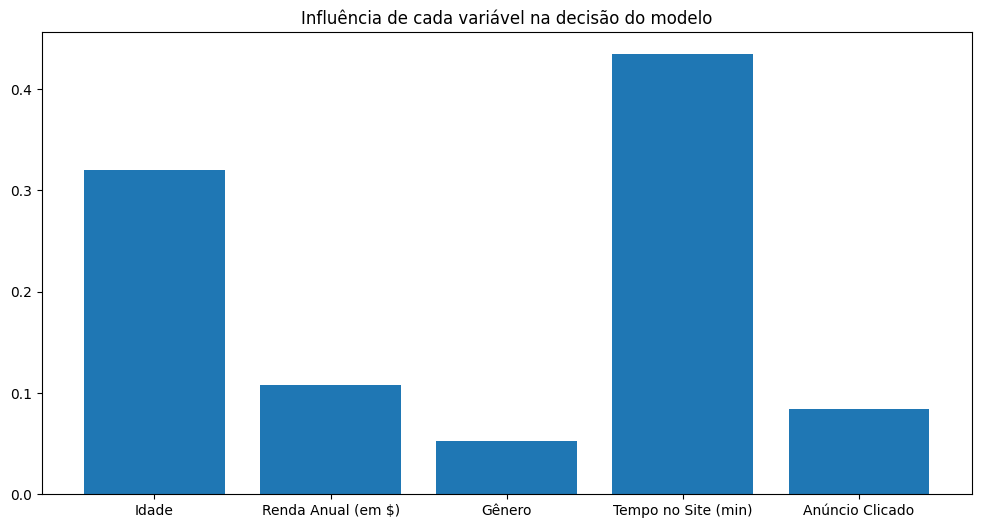

In [41]:
plt.figure(figsize=(12, 6))
plt.bar(features.columns, best_rf.feature_importances_)

plt.title("Influência de cada variável na decisão do modelo")

plt.show()